## Import libraries

In [1]:
from importlib import reload

import os
import re

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import skimage as sk
import os
import re
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import seaborn as sns

from lifelines import KaplanMeierFitter
from lifelines import WeibullFitter

wbf = WeibullFitter()
kmf = KaplanMeierFitter()

from byc import constants, files, database, segmentation
from byc import standard_analysis as sa
from byc import plotting
from byc import fitting_tools as ft

from byc import constants, plotting, files, database, utilities, trace_tools, fitting_tools, segmentation
from byc import standard_analysis as sa
from byc.trace_tools import median_filter
median_filter
from importlib import reload
for pac in [constants,
            plotting,
            files,
            sa,
            database,
            utilities,
            trace_tools,
            fitting_tools,
            segmentation]:
    reload(pac)
    
plotting.set_styles(plt, matplotlib)

strains_color_dict =  plotting.strains_color_dict
other_colors = plotting.other_colors

# Generate a palette to use for signifying number of 
# buds that will be produced before the last bud
pre_post_SEP_palette = plotting.get_pre_post_sep_palette()

## Generate fits, trace, and buds dataframes *de novo*

Do this after analyzing new experiments in `constants.byc_data_dir` and adding them to the compartments_index.csv at `constants.compartment_index_path`

In [2]:
scriptpath = os.path.join(constants.source_path, 'bin/refresh_database.py')
%run $scriptpath

Found date 20190726, compartment name 20190726_byc_pJC010_pdr5d_DsRed-P2A-UBL-YFP-NS
Found date 20190920, compartment name 20190920_byc_pJC010
Found date 20190920, compartment name 20190920_byc_pJC010_in_pdr5d_DsRed-P2A-UBL-YFP-Su9_CEN4
Found date 20190927, compartment name rpn4delta_pJC010_old_(002_003)
Found date 20190927, compartment name rpn4delta_pJC010_young_(001)
Found date 20191008, compartment name pdr5d_pJC010_young_chase
Found date 20210323, compartment name 20210323_byc_pJC272_BY4741_young_chase
Found date 20210323, compartment name 20210323_byc_pJC272_rpn4d_young_chase
Found date 20210401, compartment name 20210401_byc_pJC272_BY4741_old_chase
Found date 20210430, compartment name 20210430_(RKK-sYFP2-Su9)x2_JPC063_young_old_chase
Found date 20210507, compartment name 20210507_sYFP2-ODC_old_chase
Found date 20210514, compartment name 20210514_JPC063_RKK-sYFP2-Su9_old_chase
Found date 20210527, compartment name 20210527_sYFP2-ODC(47)x3_JPC082_pJC380_old_chase
Found date 20210

C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:312: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, column] = np.nan
C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:312: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, column] = np.nan
C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:312: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

Adding columns mating_type
Adding columns can1delta
Adding columns substrate
Adding columns other_genetic_feature
Adding columns plasmid
Adding columns background_strain
Adding columns strain_name
Adding columns xform_date
Adding columns rls_suitable
Adding columns tet_stock_concn
Adding columns pre-load-spin
Adding columns pre-load-vortex
Adding columns potential_blue_light_exposure_during_filter_cube_switching
Adding columns GFP_imaged
Labeling data from compartment 20210430_(RKK-sYFP2-Su9)x2_JPC063_young_old_chase
Adding columns background_genotype
Adding columns mating_type
Adding columns can1delta
Adding columns substrate
Adding columns other_genetic_feature
Adding columns plasmid
Adding columns background_strain
Adding columns strain_name
Adding columns xform_date
Adding columns rls_suitable
Adding columns tet_stock_concn
Adding columns pre-load-spin
Adding columns pre-load-vortex
Adding columns potential_blue_light_exposure_during_filter_cube_switching
Adding columns GFP_imaged


C:\Users\johnp\Dropbox\Projects\byc\bin\refresh_database.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  traces_df.loc[:, 'dist_from_sen_bin'] = np.nan
C:\Users\johnp\Dropbox\Projects\byc\bin\refresh_database.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, 'measdex'] = measdex


Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/traces_df.csv.gzip
Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/fits_df.csv.gzip
Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/buds_df.csv.gzip
Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/traces_df.csv
Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/fits_df.csv
Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/buds_df.csv


## Read in databases

In [2]:
traces_df, fits_df, buds_df = database.read_in_trace_fits_buds_dfs()

C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:646: DtypeWarning: Columns (64,66,71,85,89,90,94,96,97,98,99,100,101,102,103,104,105,106,107,108,172,173,175,177,209,213,214,216,217,218,219) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(savepath, compression='gzip')


Read dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/traces_df.csv.gzip
Read dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/fits_df.csv.gzip


C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:646: DtypeWarning: Columns (64,66,83,87,88,141,142,144,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(savepath, compression='gzip')


Read dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/buds_df.csv.gzip


C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:646: DtypeWarning: Columns (41,50,51,53,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(savepath, compression='gzip')


## Figure 1: A system to measure proteasome substrate turnover in continously observed replicatively aging cells

In [3]:
compartmentname = "20221201_byc_JPC220_R-YFP-Su9_HSP104-mCherry_full-traces"
exptname = utilities.exptname_from_compartment(compartmentname)
compartmentdir = files.get_byc_compartmentdir(exptname, compartmentname)
filename = f'{exptname}_alldf.csv'
savepath = os.path.join(compartmentdir, filename)
table = pd.read_csv(savepath)
tracedfs = [table[table.cell_index==i] for i in table.cell_index.unique()]

# Read in bud ROIs
relpaths = table.bud_roi_set_relpath.unique()
budpaths = [os.path.abspath(os.path.join(constants.byc_data_dir, str(path))) for path in relpaths if str(path) != 'nan']
budroidfs = [files.read_rectangular_rois_as_df(path) for path in budpaths]

for buddf in budroidfs:

    buddf.loc[:, 'frame'] = buddf.position - 1
    buddf.loc[:, 'bud_hour'] = (buddf.frame*10)/60
    # The last ROI in the bud roi df is the death
    # frame so it's not an actual budding event
    buddf.loc[buddf.index.max(), 'bud_hour'] = np.nan

C:\Users\johnp\AppData\Local\Temp\ipykernel_6172\3101354985.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  table = pd.read_csv(savepath)


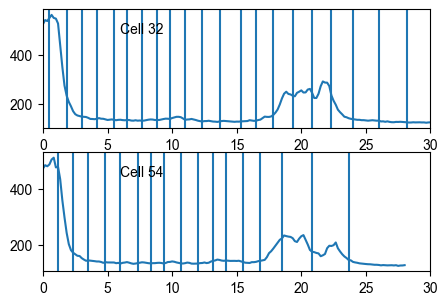

In [4]:
wanted_cells = [23, 28, 32, 54, 57, 87]
wanted_cells = [32, 54]
subtracedfs = [tracedfs[i] for i in wanted_cells]
subbudroidfs = [budroidfs[i] for i in wanted_cells]
fig, axes = plt.subplots(len(subtracedfs), 1)
fig.set_figwidth(5)
fig.set_figheight(len(subtracedfs)*1.7)


for i, df in enumerate(subtracedfs):
    buddf = subbudroidfs[i]
    ax = axes[i]
    ax.set_xlim(0, 30)
    cell_index = df.cell_index.iloc[0]
    ax.plot(df.hours, df.yfp_mean)
    ax.annotate(f'Cell {cell_index}', xy=(0.2, 0.8), xycoords='axes fraction')
    for bud in buddf.bud_hour:
        ax.axvline(bud)

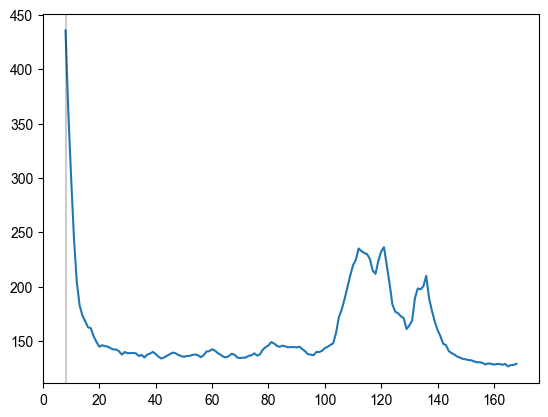

In [5]:
chase_frame2 = 8
plt.plot(df.frame[chase_frame2:], df.yfp_mean[chase_frame2:])
plt.axvline(chase_frame2, color='black', alpha=0.2)

Saved figure at
C:\Users\johnp\Dropbox\Projects\byc\data\meta\plots\x=hours_y=yfp_mean_title=full_trace.svg


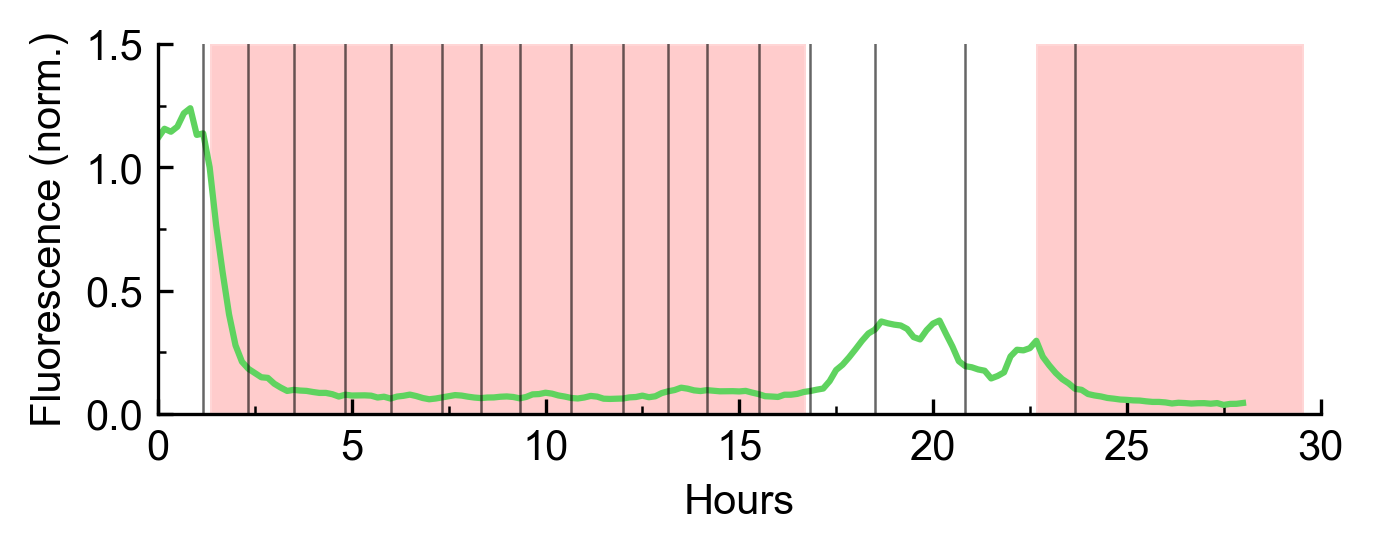

In [5]:
fig, ax = plotting.figure_ax(width_scale=2.5, height_scale=0.8)
fig.set_dpi(300)
chase_frame = 8
chase_frame2 = 136
df = tracedfs[54].copy()
buddf = budroidfs[54].copy()
if 'level_0' in df.columns:
    df.drop(columns=['level_0'], inplace=True)
df.sort_values(by='frame', ascending=True, inplace=True)
df.reset_index(inplace=True)
x = df.hours

y1 = df.yfp_mean - 115
y1 = y1/y1[chase_frame]
y2 = df.rfp_mean- df.rfp_mean.min()
y2 = y2/y2[chase_frame]
red  = (255/255, 0/255, 0/255)
green = (95/255, 211/255, 95/255)
ax.plot(x, y1, color=green, alpha=1)

ax.set_ylim(0, 1.5)
# ax.set_yticks([0, 0.5, 1])
ax.set_xlim(0, 30)
ax.set_ylabel('Fluorescence (norm.)')
ax.set_xlabel('Hours')

x1 = np.arange((chase_frame*10)/60, (chase_frame*10)/60+15.5, 0.1)
x2 = np.arange((chase_frame2*10)/60, (chase_frame2*10)/60+7, 0.1)
y = np.full(len(x1), 1.5)
y2  = np.full(len(x2), 1.5)
ax.fill_between(x1, y, color=red, alpha=0.2, edgecolor='white')
ax.fill_between(x2, y2, color=red, alpha=0.2, edgecolor='white')
for bud_hour in buddf.bud_hour:
    ax.axvline(bud_hour, color='black', alpha=0.6, lw=0.6)

plotting.format_ticks(ax)   

# Annotate chase periods
# rect = patches.Rectangle(((chase_frame*10)/60, 0), 3, 1, color='white', edgecolor='black')
# ax.add_patch(rect)

kwargs = {
    'x': 'hours',
    'y': 'yfp_mean',
    'title': 'full_trace'
}

plotting.save_figure(fig, kwargs, ext='.svg')

Saved figure at
C:\Users\johnp\Dropbox\Projects\byc\data\meta\plots\title=same_cell_young_old_x=hours_after_chase_y=yfp_mean_norm_to_chase.svg


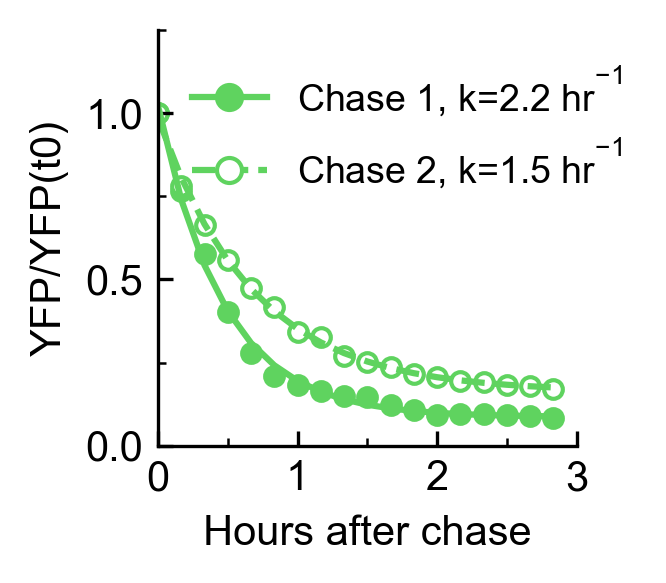

In [27]:
fig, ax = plotting.figure_ax(width_scale=0.9, height_scale=0.9)
fig.set_dpi(300)
window = 18

y = df.yfp_mean - 115
y1 = y/y[chase_frame]
y1 = y1[chase_frame:chase_frame+window]
y2 = y/y[chase_frame2]
y2 = y2[chase_frame2:chase_frame2+window]

x = df.hours[0: window]
size=20
ax.scatter(x, y1, color=green, s=size)
ax.scatter(x, y2, color='white', s=size, edgecolor=green)

ax.set_xlim(0, 3)
ax.set_xticks([0, 1, 2, 3])
ax.set_ylim(0, 1.25)
ax.set_yticks([0, 0.5, 1])

popt1, pcov = fitting_tools.curve_fit(fitting_tools.single_exp, x, y1)
popt2, pcov = fitting_tools.curve_fit(fitting_tools.single_exp, x, y2)
y_pred1 = fitting_tools.single_exp(x, *popt1)
y_pred2 = fitting_tools.single_exp(x, *popt2)

ax.plot(x, y_pred1, color=green)
ax.plot(x, y_pred2, color=green, linestyle='--')
ax.set_xlabel('Hours after chase')
ax.set_ylabel('YFP/YFP(t0)')

custom_lines = [Line2D([0], [0], color=green, linestyle='-', lw=1.5, marker='o'),
                Line2D([0], [0], color=green, linestyle='--', lw=1.5, marker='o', markerfacecolor='white')]
labels = [
    f'Chase 1, k={np.round(popt1[1], 1)} {plotting.annoying_strings().k_inverse_hrs[3:-1]}',
    f'Chase 2, k={np.round(popt2[1], 1)} {plotting.annoying_strings().k_inverse_hrs[3:-1]}'
]

ax.legend(custom_lines, labels, frameon=False, fontsize=9)

plotting.format_ticks(ax)

kwargs = {
    'title': 'same_cell_young_old',
    'x': 'hours_after_chase',
    'y': 'yfp_mean_norm_to_chase'
}

plotting.save_figure(fig, kwargs, ext='.svg')

## Figure 2: Ubiquitin-independent proteasome substrate turnover is independent of replicative age

### Plots of aggregated fluorescence traces - two-color version

Establish color palettes